In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

encoding = "ISO-8859-1"

import Jupyter_module_loader


In [2]:
# you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
    raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

BES_code_folder   = "../BES_analysis_code/" # we should be here!
BES_small_data_files = BES_code_folder + "small data files" + os.sep
if not os.path.exists( BES_small_data_files ):
    os.makedirs( BES_small_data_files )

# we should create these if they don't already exist
BES_data_folder   = "../BES_analysis_data/"
if not os.path.exists( BES_data_folder ):
    os.makedirs( BES_data_folder )

BES_output_folder = "../BES_analysis_output/"
if not os.path.exists( BES_output_folder ):
    os.makedirs( BES_output_folder )
    
BES_file_manifest = pd.read_csv( BES_small_data_files + "BES_file_manifest.csv" )

BES_R_data_files = BES_data_folder + "R_data" + os.sep
if not os.path.exists( BES_R_data_files ):
    os.makedirs( BES_R_data_files )


In [10]:
dataset_name = "W13_only"

In [4]:
%%time

manifest = BES_file_manifest[ BES_file_manifest["Name"] == dataset_name ]

data_subfolder = BES_data_folder + dataset_name + os.sep

dataset_filename = manifest["Stata_Filename"].values[0]
# dataset_description = manifest["Friendlier_Description"].values[0]
# dataset_citation = manifest["Citation"].values[0]
# dataset_start = manifest["Date_Start"].values[0]
# dataset_stop = manifest["Date_Stop"].values[0]
# dataset_wave = manifest["Wave No"].values[0]

BES_Panel = pd.read_stata( data_subfolder + dataset_filename )
print("BES_Panel", BES_Panel.shape )

####

BES_numeric = pd.read_hdf( data_subfolder + "BESnumeric.hdf", "BESnumeric" )
print("BES_numeric",  BES_numeric.shape )

var_type    = pd.read_csv( data_subfolder + "var_type.csv", encoding=encoding)
var_type.set_index("Unnamed: 0", inplace=True)
print("var_type",  var_type.shape )

fname = data_subfolder + "cat_dictionary.pkl"
with open(fname, "rb") as f:
    cat_dictionary = pickle.load( f )
    
####

BES_non_numeric = pd.read_hdf( data_subfolder + "BESnon_numeric.hdf", "BESnon_numeric" )
print("BES_non_numeric",  BES_non_numeric.shape )

BES_reduced = pd.read_hdf( data_subfolder + "BES_reduced.hdf", "BES_reduced" )
print("BES_reduced",  BES_reduced.shape )

BES_reduced_with_na = pd.read_hdf( data_subfolder + "BES_reduced_with_na.hdf", "BES_reduced_with_na")
print("BES_reduced_with_na", BES_reduced_with_na.shape )

fname = data_subfolder + "new_old_col_names.pkl"
with open(fname, "rb") as f:
    new_old_col_names = pickle.load(f) 

BES_Panel (69486, 5173)
BES_numeric (69486, 4993)
var_type (5173, 13)
BES_non_numeric (69486, 125)
BES_reduced (69486, 2526)
BES_reduced_with_na (69486, 2526)
Wall time: 19min 40s


In [15]:
import prince

In [45]:
corr_vars = ["efficacyPolCare__Strongly agree", "overseasAid__Strongly agree", "antiIntellectual__Strongly agree",
             "refAreGood__Strongly agree","harkBack__Strongly agree", "happyEULeave__Extremely happy", "strongLeader__Strongly agree",
             "blackEquality__Gone much too far", "gayEquality__Gone much too far", "femaleEquality__Gone much too far",
             "immigSelf__Allow many more", "redistSelf__Government should be less concerned about equal incomes",
             "gayMarriage__Strongly agree", "discrimBME__A lot of discrimination against",
             "discrimWhite__A lot of discrimination against", "leftRight__Right", "radical__Strongly agree"]

corr_vars = [x.split("__")[0] for x in corr_vars]

specific_vars = [x for x in BES_Panel if re.match("al[1-5]|lr[1-5]|ethno[1-6]|populism[1-6]",x) or re.match("|".join(corr_vars),x)]

# corr_vars.extend(specific_vars)

BES_std = BES_Panel[specific_vars]

In [22]:
%%time

n_components = BES_std.shape[1]

decomp = prince.PCA(n_components=2, n_iter=3, rescale_with_mean=True,\
                    rescale_with_std=True, copy=True, engine='auto' )

decomp_method = str(decomp).split("(")[0] 

X_r = decomp.fit_transform(BES_std.apply(lambda x: x.cat.codes))

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = BES_std.index)

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Wall time: 1.44 s


In [18]:
specific_vars

['efficacyPolCareW1',
 'redistSelfW1',
 'leftRightW1',
 'efficacyPolCareW2',
 'leftRightW2',
 'redistSelfW2',
 'efficacyPolCareW3',
 'leftRightW3',
 'redistSelfW3',
 'efficacyPolCareW4',
 'leftRightW4',
 'redistSelfW4',
 'leftRightW5',
 'efficacyPolCareW6',
 'leftRightW6',
 'redistSelfW6',
 'lr1W6',
 'lr2W6',
 'lr3W6',
 'lr4W6',
 'lr5W6',
 'al1W6',
 'al2W6',
 'al3W6',
 'al4W6',
 'al5W6',
 'ethno1W7',
 'ethno2W7',
 'ethno3W7',
 'ethno4W7',
 'ethno5W7',
 'ethno6W7',
 'radicalW7',
 'harkBackW7',
 'antiIntellectualW7',
 'efficacyPolCareW7',
 'leftRightW7',
 'redistSelfW7',
 'immigSelfW7',
 'populism1W7',
 'populism2W7',
 'populism4W7',
 'populism5W7',
 'populism6W7',
 'efficacyPolCareW8',
 'immigSelfW8',
 'leftRightW8',
 'antiIntellectualW8',
 'happyEULeaveW9',
 'antiIntellectualW9',
 'efficacyPolCareW9',
 'immigSelfW9',
 'ethno1W9',
 'ethno2W9',
 'ethno3W9',
 'ethno4W9',
 'ethno5W9',
 'ethno6W9',
 'leftRightW9',
 'happyEULeaveW10',
 'redistSelfW10',
 'antiIntellectualW10',
 'efficacyPolCa

In [23]:
from mca import *

In [54]:
mca_ben = MCA(pd.get_dummies(BES_std_na), ncols=10)

In [46]:
BES_std_na = BES_std[BES_std.columns[BES_std.isnull().sum()<35000]]

In [52]:
BES_std_na = BES_std_na.dropna(axis=0)

In [55]:
mca_ben

In [58]:
%%time
res = mca_ben.fs_r(N=2)

Wall time: 2min 20s


In [65]:
res = res.T

0.22266217950867878 0.20573272034819987 lr1W1W2W3W4W5_Strongly disagree
-0.03284734360458071 -0.23479058300439837 lr1W1W2W3W4W5_Disagree
-0.06666817016914647 -0.11003808606679895 lr1W1W2W3W4W5_Neither agree nor disagree
0.17806640533940893 0.04548889657688448 lr1W1W2W3W4W5_Agree
0.04544056554153784 -0.1254872080417835 lr1W1W2W3W4W5_Strongly agree
-0.03051054809521253 -0.07420863358826282 lr1W1W2W3W4W5_Don't know
0.07466059653524479 -0.267004316791742 lr2W1W2W3W4W5_Strongly disagree
0.08593748058035265 -0.22607073809763936 lr2W1W2W3W4W5_Disagree
0.287615643169844 0.776180952869161 lr2W1W2W3W4W5_Neither agree nor disagree
0.09526457150619376 -0.09105419368319798 lr2W1W2W3W4W5_Agree
-0.5561272659482419 -0.03882230911685318 lr2W1W2W3W4W5_Strongly agree
0.23095330099114603 0.37666624468587717 lr2W1W2W3W4W5_Don't know
0.09579061720450809 -0.19198914552070395 lr3W1W2W3W4W5_Strongly disagree
0.06394727396284038 -0.3605692077470049 lr3W1W2W3W4W5_Disagree
-0.08248919839055455 -0.0032744598545896

0.14794544548071042 0.09594510183843888 al3W7W8W9_Strongly agree
0.0037671508981777188 -0.13179145671739115 al3W7W8W9_Don't know
0.0092126904894751 -0.1649571163023825 al4W7W8W9_Strongly disagree
0.06762696847573028 -0.0725721780829062 al4W7W8W9_Disagree
0.0457767393185629 -0.31383807861956703 al4W7W8W9_Neither agree nor disagree
0.10437420764288396 0.1694995425342632 al4W7W8W9_Agree
-0.00927222541157734 -0.2185011113912354 al4W7W8W9_Strongly agree
-0.12728856806357067 -0.18773719704878 al4W7W8W9_Don't know
0.16755569260049294 0.13014300334616588 al5W7W8W9_Strongly disagree
-0.6953527795516993 0.13823198587919766 al5W7W8W9_Disagree
0.1822181058917931 0.0990651444866552 al5W7W8W9_Neither agree nor disagree
0.0803283431286993 0.08903920171365541 al5W7W8W9_Agree
0.03688664133657302 -0.224451557243279 al5W7W8W9_Strongly agree
0.03987706779907599 -0.007854146211521966 al5W7W8W9_Don't know
-0.16673845065501264 -0.12756174270811718 lr1W10W11W12_Strongly disagree
-0.14520329179274144 0.1232636

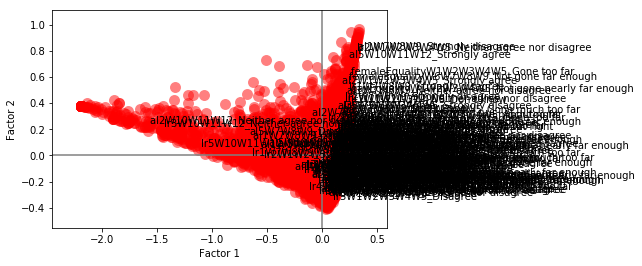

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

points = res
labels = pd.get_dummies(BES_std_na).columns.values

plt.figure()
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.scatter(*points, s=120, marker='o', c='r', alpha=.5, linewidths=0)
count=0
temp_df = pd.DataFrame(columns = ["F1","F2","Label"])
for label, x, y in zip(labels, *points):
    print(x,y,label)

    if count<1000:
        plt.annotate(label, xy=(x, y), xytext=(x + .03, y + .03))
    count = count +1
    temp_df.loc[count] =[x,y,label]   
plt.show()

In [80]:
temp_df.sort_values(by="F2")

F1        F2                                             Label
14   0.063947 -0.360569                            lr3W1W2W3W4W5_Disagree
26   0.067682 -0.335590                            lr5W1W2W3W4W5_Disagree
117  0.033192 -0.331539              al2W7W8W9_Neither agree nor disagree
18  -0.003447 -0.321340                          lr3W1W2W3W4W5_Don't know
96  -0.059995 -0.318598                              lr3W7W8W9_Don't know
129  0.045777 -0.313838              al4W7W8W9_Neither agree nor disagree
33   0.019815 -0.306703          al1W1W2W3W4W5_Neither agree nor disagree
21   0.056813 -0.306210          lr4W1W2W3W4W5_Neither agree nor disagree
181 -0.009297 -0.300985                    al3W10W11W12_Strongly disagree
171  0.054457 -0.298667           al1W10W11W12_Neither agree nor disagree
55  -0.041639 -0.297385                   al5W1W2W3W4W5_Strongly disagree
103  0.018410 -0.294948                       lr5W7W8W9_Strongly disagree
122 -0.008574 -0.291362                                al3W7W8W9_Disagree
204  0.030682 -0.285312                  blackEqualityW6W7W8W9_Don't know
100 -0.147939 -0.284847                                   lr4W7W8W9_Agree
209  0.075445 -0.281872          femaleEqualityW6W7W8W9_Gone much too far
159  0.026021 -0.270520           lr4W10W11W12_Neither agree nor disagree
212  0.081617 -0.268369           gayEqualityW6W7W8W9_Not gone far enough
7    0.074661 -0.267004                   lr2W1W2W3W4W5_Strongly disagree
168 -0.002173 -0.260984                           lr5W10W11W12_Don't know
101  0.059973 -0.258256                          lr4W7W8W9_Strongly agree
40  -0.066609 -0.257433                               al2W1W2W3W4W5_Agree
123  0.068056 -0.256227              al3W7W8W9_Neither agree nor disagree
188 -0.004056 -0.252996                             al4W10W11W12_Disagree
19   0.088493 -0.251602                   lr4W1W2W3W4W5_Strongly disagree
75   0.026021 -0.242654                 gayEqualityW1W2W3W4W5_About right
199  0.032672 -0.240574  blackEqualityW6W7W8W9_Not gone nearly far enough
165 -0.030266 -0.239524           lr5W10W11W12_Neither agree nor disagree
76   0.020473 -0.235917                gayEqualityW1W2W3W4W5_Gone too far
2   -0.032847 -0.234791                            lr1W1W2W3W4W5_Disagree
..        ...       ...                                               ...
153 -1.465028  0.194244           lr3W10W11W12_Neither agree nor disagree
80   0.225775  0.199340                                lr1W7W8W9_Disagree
1    0.222662  0.205733                   lr1W1W2W3W4W5_Strongly disagree
179  0.155144  0.205832                       al2W10W11W12_Strongly agree
200  0.136507  0.215278         blackEqualityW6W7W8W9_Not gone far enough
177 -1.594474  0.220528           al2W10W11W12_Neither agree nor disagree
119  0.129344  0.223280                          al2W7W8W9_Strongly agree
151  0.192380  0.237676                    lr3W10W11W12_Strongly disagree
88   0.020696  0.240519                                   lr2W7W8W9_Agree
64   0.224558  0.244202              blackEqualityW1W2W3W4W5_Gone too far
215  0.130981  0.264175             gayEqualityW6W7W8W9_Gone much too far
69   0.147710  0.266581              femaleEqualityW1W2W3W4W5_About right
115 -0.118917  0.279225                       al2W7W8W9_Strongly disagree
84   0.157341  0.304442                              lr1W7W8W9_Don't know
77   0.154581  0.306955           gayEqualityW1W2W3W4W5_Gone much too far
120  0.161350  0.308021                              al2W7W8W9_Don't know
124  0.111013  0.331925                                   al3W7W8W9_Agree
25   0.164424  0.336196                   lr5W1W2W3W4W5_Strongly disagree
12   0.230953  0.376666                          lr2W1W2W3W4W5_Don't know
141  0.181317  0.386811           lr1W10W11W12_Neither agree nor disagree
85   0.179672  0.405093                       lr2W7W8W9_Strongly disagree
111  0.199188  0.445360              al1W7W8W9_Neither agree nor disagree
73   0.227555  

In [ ]:
# From here:

# http://vxy10.github.io/2016/06/10/intro-MCA/